In [1]:
import deepxde as dde
import numpy as np
from deepxde.backend import pytorch
import torch
import matplotlib.pyplot as plt
from SIRD_deepxde_class import SIRD_deepxde_net
from SIRD_deepxde_class import Plot

seed = 0
np.random.seed(seed)
dde.config.set_random_seed(seed)

Using backend: pytorch



In [2]:
alpha_real = 0.2
beta_real = 0.05
gamma_real = 0.01

total  [2.18983618e+05 1.49099889e+03 3.76680909e+06 7.46607687e+05]
total  4733891.39770288


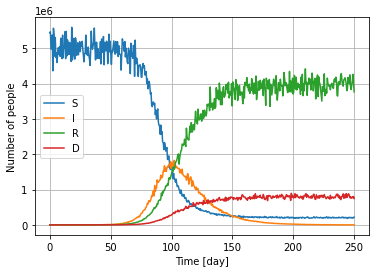

In [3]:
import ODE_SIR
solver = ODE_SIR.ODESolver()
t_synth, wsol_synth, N = solver.solve_SIRD(alpha_real, beta_real, gamma_real)
wsol_synth = solver.add_noise(wsol_synth, scale_pct=0.05)
solver.plot_SIRD(t_synth, wsol_synth)

In [4]:
max_timestep = 85
t_bool = t_synth < max_timestep
t = t_synth[t_bool]
wsol = wsol_synth[t_bool]

In [13]:
model = SIRD_deepxde_net(t, wsol, init_num_people=solver.init_num_people, model_name='hp_orig')
model.init_model(print_every=100)
model.train_model(iterations=50000, print_every=100)
alpha_nn, beta_nn, gamma_nn = model.get_best_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model.set_synthetic_data(t_synth, wsol_synth)
model.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000137 s

Training model...

Step      Train loss                                                                          Test loss                                                                           Test metric
0         [9.11e-05, 1.47e-02, 4.24e-03, 4.79e-03, 8.11e-01, 3.47e-01, 1.39e-01, 6.96e-01]    [9.11e-05, 1.47e-02, 4.24e-03, 4.79e-03, 8.11e-01, 3.47e-01, 1.39e-01, 6.96e-01]    []  
100       [2.54e-03, 4.33e-05, 3.60e-05, 1.25e-04, 9.51e-03, 9.58e-04, 3.71e-04, 4.75e-04]    [2.54e-03, 4.33e-05, 3.60e-05, 1.25e-04, 9.51e-03, 9.58e-04, 3.71e-04, 4.75e-04]    []  
200       [7.87e-04, 2.03e-05, 1.02e-05, 8.56e-05, 6.13e-03, 7.05e-04, 2.67e-04, 2.87e-04]    [7.87e-04, 2.03e-05, 1.02e-05, 8.56e-05, 6.13e-03, 7.05e-04, 2.67e-04, 2.87e-04]    []  
300       [1.94e-04, 1.72e-05, 8.75e-06, 2.82e-05, 4.83e-03, 6.22e-04, 2.35e-04, 1.41e-04]    [1.94e-04, 1.72e-05, 8.75e-06, 2.82e-05, 4.83e-03, 6.22e-04, 2.35e-04, 1.41e-04]    []  
400       [8.

# Neumann BC

In [14]:
#model_neu = SIRD_deepxde_net(t, wsol, with_neumann=True, init_num_people=solver.init_num_people, model_name='hp_neu')
#model_neu.init_model(print_every=100)
#model_neu.train_model(iterations=50000, print_every=100)
#alpha_nn, beta_nn, gamma_nn = model_neu.get_best_params()
#t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
#model_neu.set_synthetic_data(t_synth, wsol_synth)
#model_neu.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

In [15]:
#values_to_plot = ['I']
#plot_model = Plot(model, values_to_plot=values_to_plot)
#plot_model_neu = Plot(model_neu, values_to_plot=values_to_plot)

In [16]:
#fig, ax = plt.subplots()
#line = ax.scatter(plot_model.model.t_nn_synth, plot_model.model.wsol_synth[:,1], color=plot_model.colors[0], label='True',alpha=0.5)
#line = ax.plot(plot_model.model.t_synth, plot_model.model.wsol_nn_synth[:,1], color=plot_model.colors[1], label='Dirichlet')
#line = ax.plot(plot_model_neu.model.t_synth, plot_model_neu.model.wsol_nn_synth[:,1], color=plot_model_neu.colors[2], label='Cauchy')
#ax.legend(title='BC')

In [17]:
#import ODE_SIR
#solver = ODE_SIR.ODESolver()
#t_synth_p, wsol_synth_p, N = solver.solve_SIRD(alpha_real, beta_real, gamma_real)
#solver.plot_SIRD(t_synth_p, wsol_synth_p)
#max_timestep = 85
#t_bool = t_synth_p < max_timestep
#t_p = t_synth_p[t_bool]
#wsol_p = wsol_synth_p[t_bool]

In [18]:
#model_p = SIRD_deepxde_net(t_p, wsol_p, init_num_people=solver.init_num_people, model_name='hp_orig_p')
#model_p.init_model(print_every=100)
#model_p.train_model(iterations=50000, print_every=100)
#alpha_nn, beta_nn, gamma_nn = model_p.get_best_params()
#t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
#model_p.set_synthetic_data(t_synth_p, wsol_synth_p)
#model_p.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

In [19]:
#model_neu_p = SIRD_deepxde_net(t_p, wsol_p, with_neumann=True, init_num_people=solver.init_num_people, model_name='hp_neu_p')
#model_neu_p.init_model(print_every=100)
#model_neu_p.train_model(iterations=50000, print_every=100)
#alpha_nn, beta_nn, gamma_nn = model_neu_p.get_best_params()
#t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
#model_neu_p.set_synthetic_data(t_synth_p, wsol_synth_p)
#model_neu_p.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

In [20]:
#values_to_plot = ['I']
#plot_model_p = Plot(model_p, values_to_plot=values_to_plot)
#plot_model_neu_p = Plot(model_neu_p, values_to_plot=values_to_plot)

In [21]:
#fig, ax = plt.subplots()
#line = ax.scatter(plot_model_p.model.t_nn_synth, plot_model_p.model.wsol_synth[:,1], color=plot_model_p.colors[0], label='True',alpha=0.5)
#line = ax.plot(plot_model_p.model.t_synth, plot_model_p.model.wsol_nn_synth[:,1], color=plot_model_p.colors[1], label='Dirichlet')
#line = ax.plot(plot_model_neu_p.model.t_synth, plot_model_neu_p.model.wsol_nn_synth[:,1], color=plot_model_neu_p.colors[2], label='Cauchy')
#ax.legend(title='BC')

# Weight tail higher

# Activation functions

* ReLU
* Leaky ReLU
* Elu
* Sigmoid
* Tanh

In [7]:
iterations = 40000

In [8]:
model_relu = SIRD_deepxde_net(t, wsol, init_num_people=solver.init_num_people, model_name='hp_relu')
model_relu.init_model(print_every=100, activation='relu')
model_relu.train_model(iterations=iterations, print_every=100)
alpha_nn, beta_nn, gamma_nn = model_relu.get_best_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model_relu.set_synthetic_data(t_synth, wsol_synth)
model_relu.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000196 s

Training model...

Step      Train loss                                                                          Test loss                                                                           Test metric
0         [3.83e-02, 5.42e-03, 4.04e-02, 5.73e-03, 4.97e-01, 9.79e-01, 2.73e+01, 2.52e+00]    [3.83e-02, 5.42e-03, 4.04e-02, 5.73e-03, 4.97e-01, 9.79e-01, 2.73e+01, 2.52e+00]    []  
100       [5.08e-04, 4.18e-05, 4.37e-05, 4.85e-05, 7.81e-02, 1.55e-03, 1.70e-03, 1.49e-03]    [5.08e-04, 4.18e-05, 4.37e-05, 4.85e-05, 7.81e-02, 1.55e-03, 1.70e-03, 1.49e-03]    []  
200       [1.90e-04, 3.00e-05, 1.43e-05, 2.61e-05, 4.82e-03, 7.91e-04, 1.51e-04, 8.15e-05]    [1.90e-04, 3.00e-05, 1.43e-05, 2.61e-05, 4.82e-03, 7.91e-04, 1.51e-04, 8.15e-05]    []  
300       [3.09e-05, 1.95e-05, 1.00e-05, 1.14e-05, 4.70e-03, 7.39e-04, 1.51e-04, 9.61e-06]    [3.09e-05, 1.95e-05, 1.00e-05, 1.14e-05, 4.70e-03, 7.39e-04, 1.51e-04, 9.61e-06]    []  
400       [1.

In [9]:
model_elu = SIRD_deepxde_net(t, wsol, init_num_people=solver.init_num_people, model_name='hp_elu')
model_elu.init_model(print_every=100, activation='elu')
model_elu.train_model(iterations=iterations, print_every=100)
alpha_nn, beta_nn, gamma_nn = model_elu.get_best_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model_elu.set_synthetic_data(t_synth, wsol_synth)
model_elu.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000157 s

Training model...

Step      Train loss                                                                          Test loss                                                                           Test metric
0         [3.92e+01, 8.48e+01, 1.66e+00, 2.50e+00, 1.37e+01, 2.06e+02, 5.76e+01, 5.36e+01]    [3.92e+01, 8.48e+01, 1.66e+00, 2.50e+00, 1.37e+01, 2.06e+02, 5.76e+01, 5.36e+01]    []  
100       [1.71e-03, 1.51e-04, 3.48e-04, 2.46e-04, 2.04e-02, 4.57e-03, 4.62e-03, 1.82e-02]    [1.71e-03, 1.51e-04, 3.48e-04, 2.46e-04, 2.04e-02, 4.57e-03, 4.62e-03, 1.82e-02]    []  
200       [1.86e-03, 2.19e-05, 1.24e-04, 6.08e-05, 8.38e-03, 9.89e-04, 1.23e-03, 2.95e-03]    [1.86e-03, 2.19e-05, 1.24e-04, 6.08e-05, 8.38e-03, 9.89e-04, 1.23e-03, 2.95e-03]    []  
300       [1.25e-03, 2.38e-05, 5.29e-05, 2.28e-05, 5.75e-03, 8.43e-04, 7.82e-04, 1.12e-03]    [1.25e-03, 2.38e-05, 5.29e-05, 2.28e-05, 5.75e-03, 8.43e-04, 7.82e-04, 1.12e-03]    []  
400       [8.

In [10]:
model_sig = SIRD_deepxde_net(t, wsol, init_num_people=solver.init_num_people, model_name='hp_sig')
model_sig.init_model(print_every=100, activation='sigmoid')
model_sig.train_model(iterations=iterations, print_every=100)
alpha_nn, beta_nn, gamma_nn = model_sig.get_best_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model_sig.set_synthetic_data(t_synth, wsol_synth)
model_sig.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000319 s

Training model...

Step      Train loss                                                                          Test loss                                                                           Test metric
0         [6.70e-05, 1.68e-02, 3.66e-03, 3.82e-03, 1.21e+00, 3.51e-01, 3.52e-02, 2.05e+00]    [6.70e-05, 1.68e-02, 3.66e-03, 3.82e-03, 1.21e+00, 3.51e-01, 3.52e-02, 2.05e+00]    []  


C:\Users\willi\anaconda3\lib\site-packages\torch\nn\functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


100       [2.77e-06, 8.32e-07, 1.46e-06, 7.52e-06, 6.61e-03, 1.60e-03, 2.76e-04, 1.70e-04]    [2.77e-06, 8.32e-07, 1.46e-06, 7.52e-06, 6.61e-03, 1.60e-03, 2.76e-04, 1.70e-04]    []  
200       [3.20e-06, 1.04e-06, 1.32e-06, 4.87e-06, 6.32e-03, 1.40e-03, 2.29e-04, 1.44e-04]    [3.20e-06, 1.04e-06, 1.32e-06, 4.87e-06, 6.32e-03, 1.40e-03, 2.29e-04, 1.44e-04]    []  
300       [3.92e-06, 1.57e-06, 1.77e-06, 3.54e-06, 6.04e-03, 1.28e-03, 2.19e-04, 1.09e-04]    [3.92e-06, 1.57e-06, 1.77e-06, 3.54e-06, 6.04e-03, 1.28e-03, 2.19e-04, 1.09e-04]    []  
400       [3.40e-06, 2.26e-06, 2.26e-06, 3.39e-06, 5.63e-03, 1.10e-03, 1.86e-04, 7.93e-05]    [3.40e-06, 2.26e-06, 2.26e-06, 3.39e-06, 5.63e-03, 1.10e-03, 1.86e-04, 7.93e-05]    []  
500       [4.05e-06, 2.89e-06, 2.61e-06, 3.75e-06, 5.34e-03, 9.88e-04, 1.84e-04, 7.03e-05]    [4.05e-06, 2.89e-06, 2.61e-06, 3.75e-06, 5.34e-03, 9.88e-04, 1.84e-04, 7.03e-05]    []  
600       [4.16e-06, 3.55e-06, 3.00e-06, 4.50e-06, 5.11e-03, 9.03e-04, 1.70e-04, 6.99

In [11]:
model_tanh = SIRD_deepxde_net(t, wsol, init_num_people=solver.init_num_people, model_name='hp_tanh')
model_tanh.init_model(print_every=100, activation='tanh')
model_tanh.train_model(iterations=iterations, print_every=100)
alpha_nn, beta_nn, gamma_nn = model_tanh.get_best_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model_tanh.set_synthetic_data(t_synth, wsol_synth)
model_tanh.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000121 s

Training model...

Step      Train loss                                                                          Test loss                                                                           Test metric
0         [4.11e-04, 9.34e-03, 1.94e-03, 9.66e-03, 1.45e+00, 1.70e-01, 1.37e-01, 9.98e-01]    [4.11e-04, 9.34e-03, 1.94e-03, 9.66e-03, 1.45e+00, 1.70e-01, 1.37e-01, 9.98e-01]    []  
100       [1.70e-03, 6.96e-05, 1.19e-05, 5.70e-05, 7.22e-03, 1.04e-03, 3.25e-04, 1.19e-04]    [1.70e-03, 6.96e-05, 1.19e-05, 5.70e-05, 7.22e-03, 1.04e-03, 3.25e-04, 1.19e-04]    []  
200       [3.91e-04, 3.63e-05, 5.82e-06, 1.05e-04, 4.33e-03, 7.99e-04, 1.07e-04, 9.01e-05]    [3.91e-04, 3.63e-05, 5.82e-06, 1.05e-04, 4.33e-03, 7.99e-04, 1.07e-04, 9.01e-05]    []  
300       [1.69e-04, 1.21e-05, 5.67e-06, 4.59e-05, 3.93e-03, 6.45e-04, 9.09e-05, 2.55e-05]    [1.69e-04, 1.21e-05, 5.67e-06, 4.59e-05, 3.93e-03, 6.45e-04, 9.09e-05, 2.55e-05]    []  
400       [1.

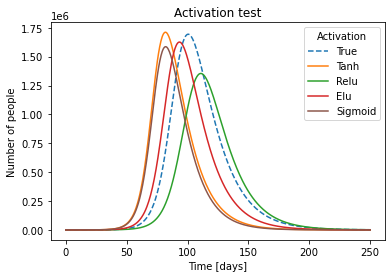

In [37]:
solver = ODE_SIR.ODESolver()
t_true, wsol_true, N = solver.solve_SIRD(alpha_real, beta_real, gamma_real)

values_to_plot = ['I']
plot_model = Plot(model, values_to_plot=values_to_plot)
plot_model_tanh = Plot(model_tanh, values_to_plot=values_to_plot)
plot_model_relu = Plot(model_relu, values_to_plot=values_to_plot)
plot_model_elu = Plot(model_elu, values_to_plot=values_to_plot)
plot_model_sig = Plot(model_sig, values_to_plot=values_to_plot)

fig, ax = plt.subplots()
line = ax.plot(t_true, wsol_true[:,1], color=plot_model.colors[0], label='True', linestyle='--')
line = ax.plot(plot_model_tanh.model.t_synth, plot_model_tanh.model.wsol_nn_synth[:,1], color=plot_model_tanh.colors[1], label='Tanh')
line = ax.plot(plot_model_relu.model.t_synth, plot_model_relu.model.wsol_nn_synth[:,1], color=plot_model_relu.colors[2], label='Relu')
line = ax.plot(plot_model_elu.model.t_synth, plot_model_elu.model.wsol_nn_synth[:,1], color=plot_model_elu.colors[3], label='Elu')
line = ax.plot(plot_model_sig.model.t_synth, plot_model_sig.model.wsol_nn_synth[:,1], color='C5', label='Sigmoid')

ax.legend(title='Activation')
ax.set_title('Activation test')
ax.set_xlabel('Time [days]')
ax.set_ylabel('Number of people')
plt.savefig('activation_hp')

# Layer size

In [23]:
iterations=40000
print_every=100

In [24]:
layer_size = [1] + [32] * 2 + [4]

model_2l = SIRD_deepxde_net(t, wsol, init_num_people=solver.init_num_people, model_name='hp_ls2')
model_2l.init_model(print_every=print_every, layer_size=layer_size)
model_2l.train_model(iterations=iterations, print_every=print_every)
alpha_nn, beta_nn, gamma_nn = model_2l.get_best_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model_2l.set_synthetic_data(t_synth, wsol_synth)
model_2l.set_nn_synthetic_data(t_nn_param, wsol_nn_param)


Compiling model...
'compile' took 0.000118 s

Training model...

Step      Train loss                                                                          Test loss                                                                           Test metric
0         [2.54e-03, 1.14e-02, 1.80e-03, 2.09e-03, 2.96e+00, 1.22e-01, 3.27e-02, 7.90e-03]    [2.54e-03, 1.14e-02, 1.80e-03, 2.09e-03, 2.96e+00, 1.22e-01, 3.27e-02, 7.90e-03]    []  
100       [2.85e-03, 6.20e-05, 1.29e-04, 3.60e-05, 9.81e-03, 7.89e-04, 1.33e-03, 7.89e-04]    [2.85e-03, 6.20e-05, 1.29e-04, 3.60e-05, 9.81e-03, 7.89e-04, 1.33e-03, 7.89e-04]    []  
200       [1.09e-03, 5.20e-05, 6.11e-05, 1.55e-05, 6.88e-03, 7.49e-04, 5.57e-04, 3.11e-04]    [1.09e-03, 5.20e-05, 6.11e-05, 1.55e-05, 6.88e-03, 7.49e-04, 5.57e-04, 3.11e-04]    []  
300       [4.20e-04, 1.93e-05, 5.49e-05, 2.53e-05, 5.63e-03, 7.01e-04, 2.87e-04, 1.13e-04]    [4.20e-04, 1.93e-05, 5.49e-05, 2.53e-05, 5.63e-03, 7.01e-04, 2.87e-04, 1.13e-04]    []  
400       [2.

In [25]:
layer_size = [1] + [32] * 3 + [4]

model_3l = SIRD_deepxde_net(t, wsol, init_num_people=solver.init_num_people, model_name='hp_ls3')
model_3l.init_model(print_every=print_every, layer_size=layer_size)
model_3l.train_model(iterations=iterations, print_every=print_every)
alpha_nn, beta_nn, gamma_nn = model_3l.get_best_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model_3l.set_synthetic_data(t_synth, wsol_synth)
model_3l.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000124 s

Training model...

Step      Train loss                                                                          Test loss                                                                           Test metric
0         [1.39e-04, 2.34e-02, 7.24e-03, 4.56e-03, 1.11e+00, 4.66e-01, 3.05e-01, 5.04e-01]    [1.39e-04, 2.34e-02, 7.24e-03, 4.56e-03, 1.11e+00, 4.66e-01, 3.05e-01, 5.04e-01]    []  
100       [2.99e-03, 3.44e-05, 3.45e-05, 1.51e-05, 8.32e-03, 9.98e-04, 1.55e-03, 5.80e-05]    [2.99e-03, 3.44e-05, 3.45e-05, 1.51e-05, 8.32e-03, 9.98e-04, 1.55e-03, 5.80e-05]    []  
200       [8.84e-04, 1.97e-05, 1.05e-04, 1.39e-05, 4.98e-03, 8.57e-04, 8.00e-04, 3.80e-05]    [8.84e-04, 1.97e-05, 1.05e-04, 1.39e-05, 4.98e-03, 8.57e-04, 8.00e-04, 3.80e-05]    []  
300       [2.96e-04, 1.62e-05, 1.21e-04, 1.03e-05, 4.08e-03, 8.18e-04, 3.88e-04, 3.75e-05]    [2.96e-04, 1.62e-05, 1.21e-04, 1.03e-05, 4.08e-03, 8.18e-04, 3.88e-04, 3.75e-05]    []  
400       [1.

In [26]:
layer_size = [1] + [32] * 4 + [4]

model_4l = SIRD_deepxde_net(t, wsol, init_num_people=solver.init_num_people, model_name='hp_ls4')
model_4l.init_model(print_every=print_every, layer_size=layer_size)
model_4l.train_model(iterations=iterations, print_every=print_every)
alpha_nn, beta_nn, gamma_nn = model_4l.get_best_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model_4l.set_synthetic_data(t_synth, wsol_synth)
model_4l.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000195 s

Training model...

Step      Train loss                                                                          Test loss                                                                           Test metric
0         [3.34e-03, 4.75e-02, 1.65e-02, 1.59e-02, 3.44e-01, 1.45e+00, 2.57e-01, 1.16e-01]    [3.34e-03, 4.75e-02, 1.65e-02, 1.59e-02, 3.44e-01, 1.45e+00, 2.57e-01, 1.16e-01]    []  
100       [1.21e-03, 7.13e-05, 3.84e-05, 6.64e-05, 9.95e-03, 2.02e-03, 5.00e-04, 3.54e-05]    [1.21e-03, 7.13e-05, 3.84e-05, 6.64e-05, 9.95e-03, 2.02e-03, 5.00e-04, 3.54e-05]    []  
200       [3.61e-04, 7.83e-05, 3.74e-05, 5.11e-05, 6.82e-03, 1.67e-03, 2.91e-04, 3.25e-05]    [3.61e-04, 7.83e-05, 3.74e-05, 5.11e-05, 6.82e-03, 1.67e-03, 2.91e-04, 3.25e-05]    []  
300       [1.14e-04, 3.99e-05, 1.33e-05, 2.14e-05, 6.17e-03, 1.50e-03, 2.44e-04, 5.06e-05]    [1.14e-04, 3.99e-05, 1.33e-05, 2.14e-05, 6.17e-03, 1.50e-03, 2.44e-04, 5.06e-05]    []  
400       [4.

In [27]:
layer_size = [1] + [32] * 5 + [4]

model_5l = SIRD_deepxde_net(t, wsol, init_num_people=solver.init_num_people, model_name='hp_ls5')
model_5l.init_model(print_every=print_every, layer_size=layer_size)
model_5l.train_model(iterations=iterations, print_every=print_every)
alpha_nn, beta_nn, gamma_nn = model_5l.get_best_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model_5l.set_synthetic_data(t_synth, wsol_synth)
model_5l.set_nn_synthetic_data(t_nn_param, wsol_nn_param)



Compiling model...
'compile' took 0.000164 s

Training model...

Step      Train loss                                                                          Test loss                                                                           Test metric
0         [1.31e-03, 1.65e-03, 2.29e-03, 4.39e-03, 3.03e-01, 4.35e-02, 1.60e-01, 1.69e-01]    [1.31e-03, 1.65e-03, 2.29e-03, 4.39e-03, 3.03e-01, 4.35e-02, 1.60e-01, 1.69e-01]    []  
100       [1.11e-03, 2.84e-05, 4.92e-05, 1.57e-05, 6.48e-03, 8.80e-04, 3.03e-04, 1.53e-04]    [1.11e-03, 2.84e-05, 4.92e-05, 1.57e-05, 6.48e-03, 8.80e-04, 3.03e-04, 1.53e-04]    []  
200       [7.94e-05, 1.90e-05, 2.03e-05, 1.09e-05, 3.96e-03, 6.92e-04, 1.59e-04, 4.53e-05]    [7.94e-05, 1.90e-05, 2.03e-05, 1.09e-05, 3.96e-03, 6.92e-04, 1.59e-04, 4.53e-05]    []  
300       [2.98e-05, 8.25e-06, 4.99e-06, 6.20e-06, 3.64e-03, 5.28e-04, 9.56e-05, 2.16e-05]    [2.98e-05, 8.25e-06, 4.99e-06, 6.20e-06, 3.64e-03, 5.28e-04, 9.56e-05, 2.16e-05]    []  
400       [2.

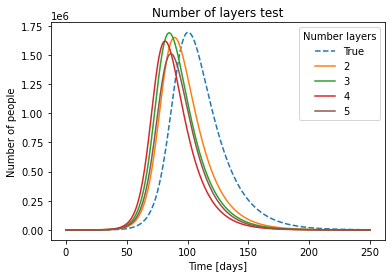

In [38]:
solver = ODE_SIR.ODESolver()
t_true, wsol_true, N = solver.solve_SIRD(alpha_real, beta_real, gamma_real)

values_to_plot = ['I']
plot_model = Plot(model, values_to_plot=values_to_plot)
plot_model_2l = Plot(model_2l, values_to_plot=values_to_plot)
plot_model_3l = Plot(model_3l, values_to_plot=values_to_plot)
plot_model_4l = Plot(model_4l, values_to_plot=values_to_plot)
plot_model_5l = Plot(model_5l, values_to_plot=values_to_plot)

fig, ax = plt.subplots()
line = ax.plot(t_true, wsol_true[:,1], color=plot_model.colors[0], label='True',linestyle='--')
line = ax.plot(plot_model_2l.model.t_synth, plot_model_2l.model.wsol_nn_synth[:,1], color=plot_model_2l.colors[1], label='2')
line = ax.plot(plot_model_3l.model.t_synth, plot_model_3l.model.wsol_nn_synth[:,1], color=plot_model_3l.colors[2], label='3')
line = ax.plot(plot_model_4l.model.t_synth, plot_model_4l.model.wsol_nn_synth[:,1], color=plot_model_4l.colors[3], label='4')
line = ax.plot(plot_model_5l.model.t_synth, plot_model_5l.model.wsol_nn_synth[:,1], color='C5', label='5')

ax.legend(title='Number layers')
ax.set_title('Number of layers test')
ax.set_xlabel('Time [days]')
ax.set_ylabel('Number of people')
plt.savefig('activation_layers')

# Initializer?

# Learn rate (optimizer)

In [29]:
iterations=40000
print_every=100

In [30]:
lr=0.001

model_0001l = SIRD_deepxde_net(t, wsol, init_num_people=solver.init_num_people, model_name='hp_lr0001')
model_0001l.init_model(print_every=print_every, lr=lr)
model_0001l.train_model(iterations=iterations, print_every=print_every)
alpha_nn, beta_nn, gamma_nn = model_0001l.get_best_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model_0001l.set_synthetic_data(t_synth, wsol_synth)
model_0001l.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000134 s

Training model...

Step      Train loss                                                                          Test loss                                                                           Test metric
0         [4.05e-03, 1.19e-01, 1.94e-02, 1.95e-02, 1.95e+00, 1.77e+00, 1.32e-01, 2.22e-01]    [4.05e-03, 1.19e-01, 1.94e-02, 1.95e-02, 1.95e+00, 1.77e+00, 1.32e-01, 2.22e-01]    []  
100       [2.61e-03, 2.63e-05, 9.40e-05, 2.68e-05, 8.10e-03, 1.32e-03, 1.35e-04, 2.48e-04]    [2.61e-03, 2.63e-05, 9.40e-05, 2.68e-05, 8.10e-03, 1.32e-03, 1.35e-04, 2.48e-04]    []  
200       [7.43e-04, 3.40e-05, 8.25e-05, 7.73e-05, 5.06e-03, 1.45e-03, 1.69e-04, 1.16e-04]    [7.43e-04, 3.40e-05, 8.25e-05, 7.73e-05, 5.06e-03, 1.45e-03, 1.69e-04, 1.16e-04]    []  
300       [2.91e-04, 3.03e-05, 5.77e-05, 4.48e-05, 4.38e-03, 1.23e-03, 1.53e-04, 5.27e-05]    [2.91e-04, 3.03e-05, 5.77e-05, 4.48e-05, 4.38e-03, 1.23e-03, 1.53e-04, 5.27e-05]    []  
400       [1.

In [31]:
lr=0.01

model_001l = SIRD_deepxde_net(t, wsol, init_num_people=solver.init_num_people, model_name='hp_lr001')
model_001l.init_model(print_every=print_every, lr=lr)
model_001l.train_model(iterations=iterations, print_every=print_every)
alpha_nn, beta_nn, gamma_nn = model_001l.get_best_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model_001l.set_synthetic_data(t_synth, wsol_synth)
model_001l.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000155 s

Training model...

Step      Train loss                                                                          Test loss                                                                           Test metric
0         [2.65e-03, 3.26e-04, 1.51e-03, 3.23e-03, 3.95e-02, 1.51e-02, 4.89e-02, 1.46e-01]    [2.65e-03, 3.26e-04, 1.51e-03, 3.23e-03, 3.95e-02, 1.51e-02, 4.89e-02, 1.46e-01]    []  
100       [3.13e-05, 9.36e-06, 3.70e-05, 3.73e-05, 4.70e-03, 1.02e-03, 1.50e-04, 4.92e-05]    [3.13e-05, 9.36e-06, 3.70e-05, 3.73e-05, 4.70e-03, 1.02e-03, 1.50e-04, 4.92e-05]    []  
200       [2.52e-05, 2.55e-06, 5.55e-06, 8.70e-06, 4.05e-03, 6.03e-04, 1.72e-04, 1.12e-05]    [2.52e-05, 2.55e-06, 5.55e-06, 8.70e-06, 4.05e-03, 6.03e-04, 1.72e-04, 1.12e-05]    []  
300       [2.55e-05, 4.03e-06, 1.10e-06, 2.21e-06, 4.26e-03, 4.64e-04, 1.71e-04, 5.94e-05]    [2.55e-05, 4.03e-06, 1.10e-06, 2.21e-06, 4.26e-03, 4.64e-04, 1.71e-04, 5.94e-05]    []  
400       [2.

In [32]:
lr=0.1

model_01l = SIRD_deepxde_net(t, wsol, init_num_people=solver.init_num_people, model_name='hp_lr01')
model_01l.init_model(print_every=print_every, lr=lr)
model_01l.train_model(iterations=iterations, print_every=print_every)
alpha_nn, beta_nn, gamma_nn = model_01l.get_best_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model_01l.set_synthetic_data(t_synth, wsol_synth)
model_01l.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000169 s

Training model...

Step      Train loss                                                                          Test loss                                                                           Test metric
0         [2.15e-03, 7.87e-03, 4.25e-03, 3.43e-03, 2.20e-01, 3.02e-01, 1.22e-01, 1.89e-01]    [2.15e-03, 7.87e-03, 4.25e-03, 3.43e-03, 2.20e-01, 3.02e-01, 1.22e-01, 1.89e-01]    []  
100       [1.56e-05, 1.07e-04, 1.22e-05, 1.29e-05, 6.90e-03, 1.57e-03, 3.52e-04, 1.53e-04]    [1.56e-05, 1.07e-04, 1.22e-05, 1.29e-05, 6.90e-03, 1.57e-03, 3.52e-04, 1.53e-04]    []  
200       [9.38e-06, 6.47e-05, 7.41e-06, 7.76e-06, 6.85e-03, 1.62e-03, 2.72e-04, 1.05e-05]    [9.38e-06, 6.47e-05, 7.41e-06, 7.76e-06, 6.85e-03, 1.62e-03, 2.72e-04, 1.05e-05]    []  
300       [8.47e-06, 6.43e-05, 7.32e-06, 7.65e-06, 6.85e-03, 1.62e-03, 2.72e-04, 1.05e-05]    [8.47e-06, 6.43e-05, 7.32e-06, 7.65e-06, 6.85e-03, 1.62e-03, 2.72e-04, 1.05e-05]    []  
400       [7.

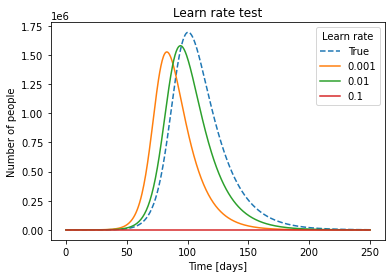

In [39]:
values_to_plot = ['I']
plot_model = Plot(model, values_to_plot=values_to_plot)
plot_model_0001l = Plot(model_0001l, values_to_plot=values_to_plot)
plot_model_001l = Plot(model_001l, values_to_plot=values_to_plot)
plot_model_01l = Plot(model_01l, values_to_plot=values_to_plot)

fig, ax = plt.subplots()
line = ax.plot(t_true, wsol_true[:,1], color=plot_model.colors[0], label='True',linestyle='--')
line = ax.plot(plot_model_0001l.model.t_synth, plot_model_0001l.model.wsol_nn_synth[:,1], color=plot_model_0001l.colors[1], label='0.001')
line = ax.plot(plot_model_001l.model.t_synth, plot_model_001l.model.wsol_nn_synth[:,1], color=plot_model_001l.colors[2], label='0.01')
line = ax.plot(plot_model_01l.model.t_synth, plot_model_01l.model.wsol_nn_synth[:,1], color=plot_model_01l.colors[3], label='0.1')

ax.legend(title='Learn rate')
ax.set_title('Learn rate test')
ax.set_xlabel('Time [days]')
ax.set_ylabel('Number of people')
plt.savefig('activation_lr')